# Sleep Health Prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [2]:
sleep_health_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
sleep_health_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep_health_data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
sleep_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
sleep_health_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#Preprocessing

In [8]:
print('Occupation Unique Values: ', sleep_health_data['Occupation'].unique())

print('\nSleep Disorder Unique Values: ', sleep_health_data['Sleep Disorder'].unique())

print('\nBMI Category Unique Values: ', sleep_health_data['BMI Category'].unique())


Occupation Unique Values:  ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Sleep Disorder Unique Values:  ['None' 'Sleep Apnea' 'Insomnia']

BMI Category Unique Values:  ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [9]:
sleep_health_data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [23]:
sleep_health_new = pd.concat([sleep_health_data, sleep_health_data['Blood Pressure'].
            str.split('/',expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [24]:
sleep_health_new

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [25]:
sleep_health_new = sleep_health_new.rename(columns ={0: 'BloodPressure_upperval', 1: 'BloodPressure_lowerval'})

In [26]:
sleep_health_new

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_upperval,BloodPressure_lowerval
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [27]:
sleep_health_new['BloodPressure_upperval'] = sleep_health_new['BloodPressure_upperval'].astype(float)
sleep_health_new['BloodPressure_lowerval'] = sleep_health_new['BloodPressure_lowerval'].astype(float)

In [28]:
sleep_health_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  BloodPressure_upperval   374 non-null    float64
 13  BloodPressure_lowerval   374 non-null    float64
dtypes: float64(3), int64(7), o

# Label encoding 

In [32]:
from sklearn.preprocessing import LabelEncoder 

In [33]:
LE = LabelEncoder()

In [34]:
sleep_health_new['Gender'] = LE.fit_transform(sleep_health_new['Gender'])
sleep_health_new['Occupation'] = LE.fit_transform(sleep_health_new['Occupation'])
sleep_health_new['BMI Category'] = LE.fit_transform(sleep_health_new['BMI Category'])
sleep_health_new['Sleep Disorder'] = LE.fit_transform(sleep_health_new['Sleep Disorder'])
sleep_health_new.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_upperval,BloodPressure_lowerval
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0


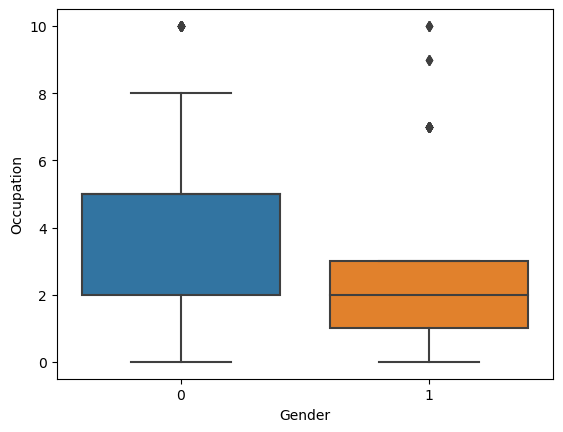

In [50]:
sns.boxplot(x = 'Gender', y = 'Occupation', data = sleep_health_new)
plt.show()

# Remove outliers

In [51]:
cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_upperval', 'BloodPressure_lowerval']

Q1 = sleep_health_new[cols].quantile(0.25)
Q3 = sleep_health_new[cols].quantile(0.75)
IQR = Q3 - Q1

sleep_health_new = sleep_health_new[~((sleep_health_new[cols] < (Q1 - 1.5 * IQR)) | (sleep_health_new[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
sleep_health_new.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_upperval,BloodPressure_lowerval
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0
8,9,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0


# EDA

In [54]:
sleep_hm = sleep_health_new.corr(method = 'pearson')
sleep_hm

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_upperval,BloodPressure_lowerval
Person ID,1.000000,-0.616335,0.990037,0.326567,0.263134,0.390001,0.109790,-0.366938,0.562202,-0.191564,-0.013341,0.197831,0.674325,0.631099
Gender,-0.616335,1.000000,-0.627738,-0.221461,-0.131019,-0.323473,-0.002468,0.418940,-0.371472,0.218090,0.023853,-0.258748,-0.252345,-0.297175
Age,0.990037,-0.627738,1.000000,0.283383,0.315749,0.439260,0.142077,-0.397676,0.543666,-0.193177,0.003712,0.263489,0.666214,0.632673
Occupation,0.326567,-0.221461,0.283383,1.000000,-0.300616,-0.245145,-0.071944,-0.016720,0.713391,0.018465,-0.097703,-0.185218,0.537932,0.537502
Sleep Duration,0.263134,-0.131019,0.315749,-0.300616,1.000000,0.889815,0.174076,-0.801368,-0.373865,-0.612842,-0.086963,0.193711,-0.172908,-0.163647
Quality of Sleep,0.390001,-0.323473,0.439260,-0.245145,0.889815,1.000000,0.127943,-0.908132,-0.306234,-0.721403,-0.093540,0.217127,-0.086196,-0.091125
Physical Activity Level,0.109790,-0.002468,0.142077,-0.071944,0.174076,0.127943,1.000000,0.012020,0.093358,0.256545,0.820730,0.466927,0.295088,0.404592
Stress Level,-0.366938,0.418940,-0.397676,-0.016720,-0.801368,-0.908132,0.012020,1.000000,0.155039,0.823647,0.249656,-0.038693,0.092676,0.086953
BMI Category,0.562202,-0.371472,0.543666,0.713391,-0.373865,-0.306234,0.093358,0.155039,1.000000,0.298178,0.038417,0.007806,0.719388,0.752678
Heart Rate,-0.191564,0.218090,-0.193177,0.018465,-0.612842,-0.721403,0.256545,0.823647,0.298178,1.000000,0.318414,0.214638,0.202218,0.231000


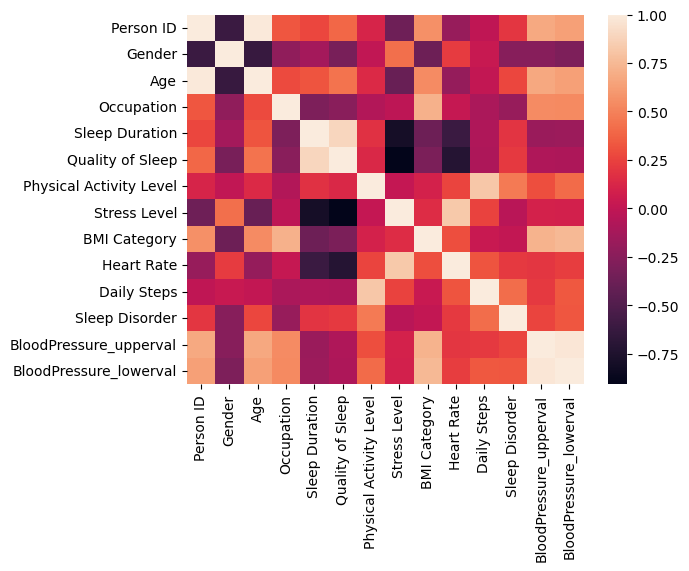

In [55]:
sns.heatmap(sleep_hm)
plt.show()

In [56]:
sleep_health_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                359 non-null    int64  
 1   Gender                   359 non-null    int32  
 2   Age                      359 non-null    int64  
 3   Occupation               359 non-null    int32  
 4   Sleep Duration           359 non-null    float64
 5   Quality of Sleep         359 non-null    int64  
 6   Physical Activity Level  359 non-null    int64  
 7   Stress Level             359 non-null    int64  
 8   BMI Category             359 non-null    int32  
 9   Heart Rate               359 non-null    int64  
 10  Daily Steps              359 non-null    int64  
 11  Sleep Disorder           359 non-null    int32  
 12  BloodPressure_upperval   359 non-null    float64
 13  BloodPressure_lowerval   359 non-null    float64
dtypes: float64(3), int32(4), i

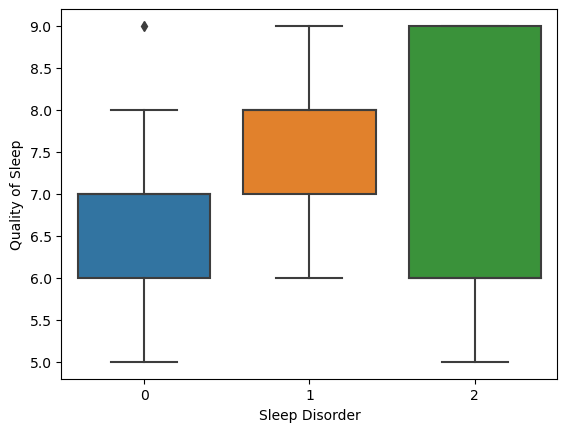

In [63]:
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=sleep_health_new)
plt.show()

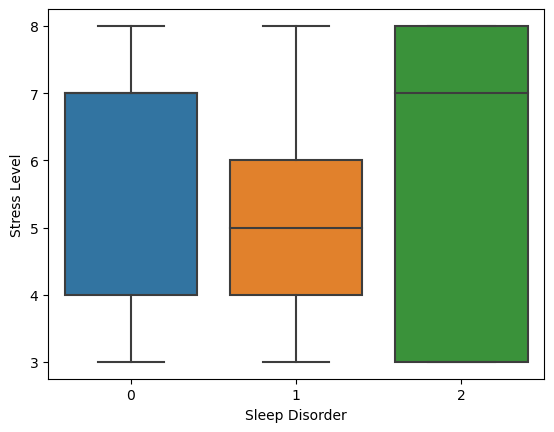

In [64]:
sns.boxplot(x="Sleep Disorder", y="Stress Level", data = sleep_health_new)
plt.show()

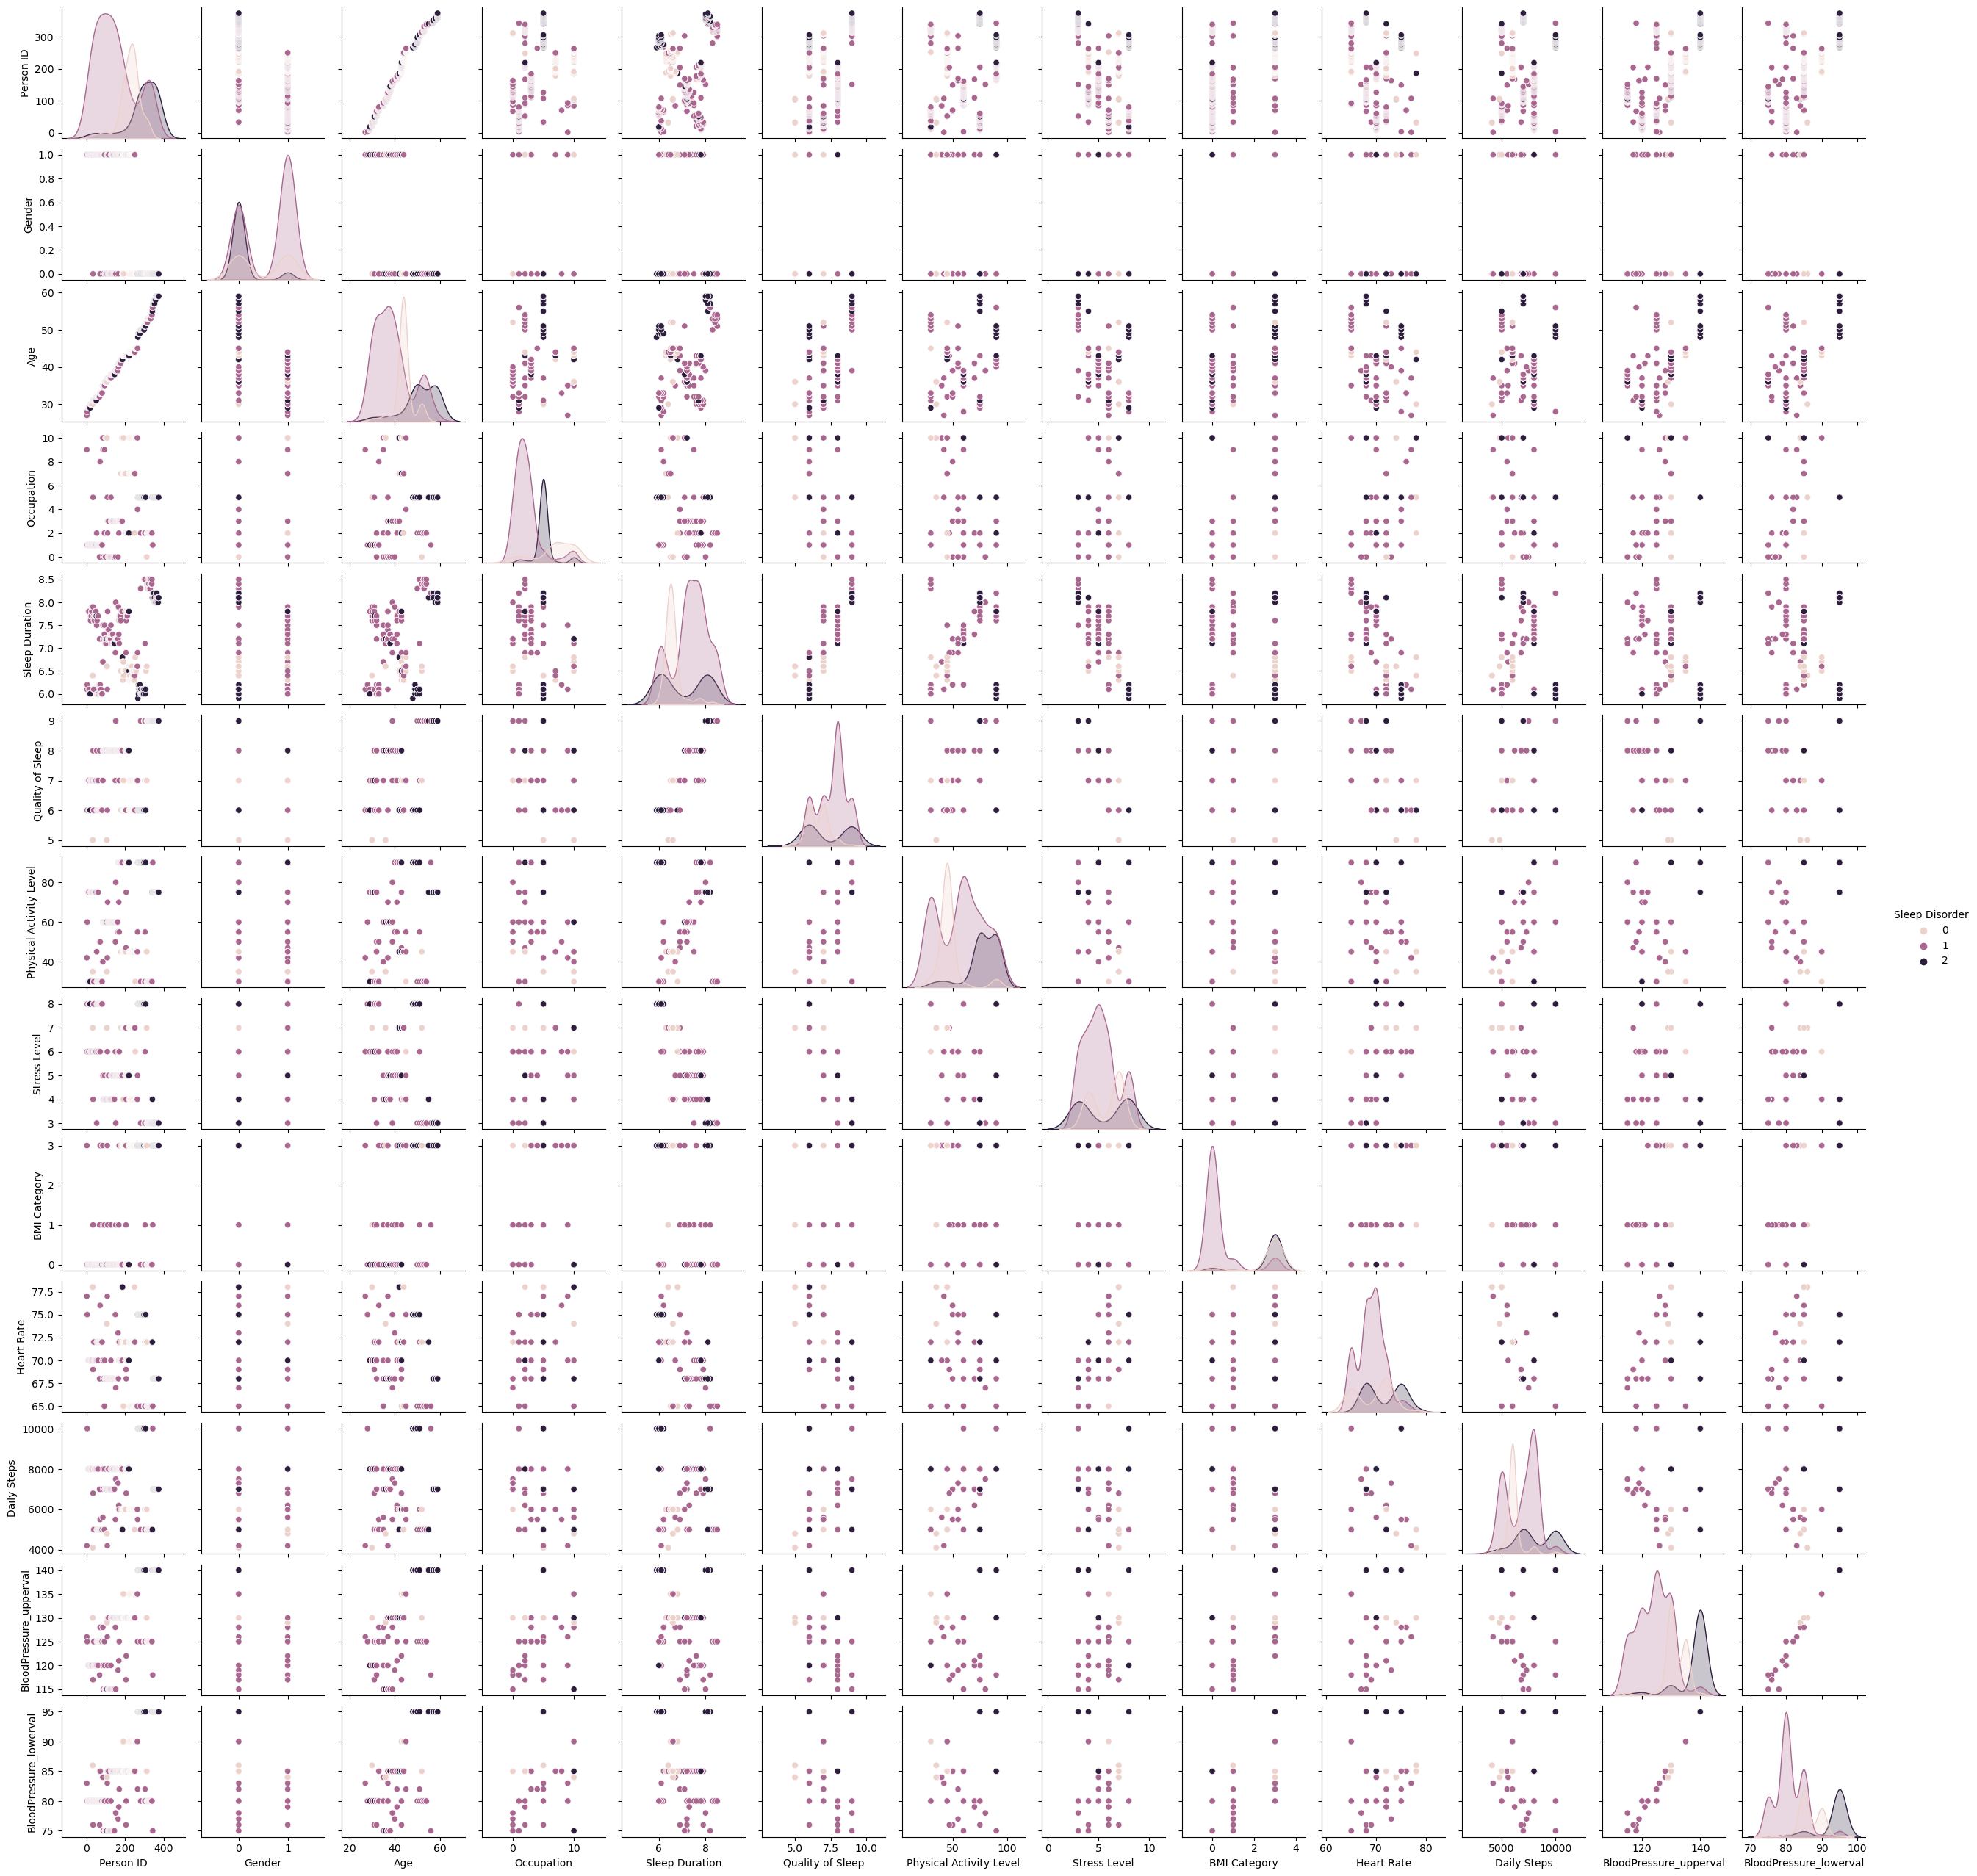

In [67]:
sns.pairplot(hue='Sleep Disorder',height = 2, data = sleep_health_new)
plt.show()

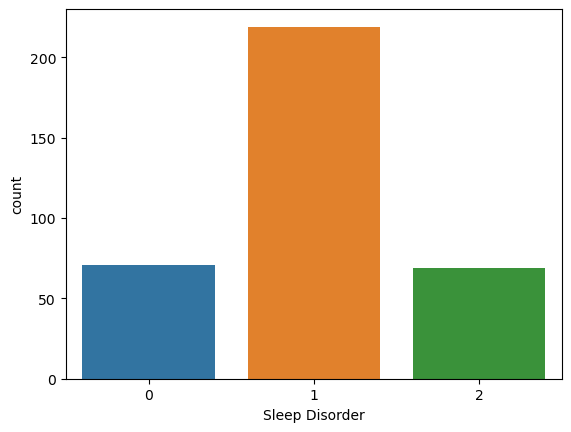

In [69]:
sns.countplot(x='Sleep Disorder',data = sleep_health_new)
plt.show()

In [71]:
sleep_health_new['Sleep Disorder'].value_counts()
#1- None, 0-Sleep, Apnea 2-Insomnia

1    219
0     71
2     69
Name: Sleep Disorder, dtype: int64

In [141]:
X = sleep_health_new.drop(['Person ID', 'Sleep Disorder'], axis=1)

In [142]:
Y = sleep_health_new['Sleep Disorder']

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=1)

# Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [160]:
sleep_DT = DecisionTreeClassifier()

In [165]:
sleep_DT = sleep_DT.fit(X_train, Y_train)

In [166]:
sleepDT_pred = sleep_DT.predict(X_test)

In [167]:
print("Accuracy:",metrics.accuracy_score(Y_test,sleepDT_pred))

Accuracy: 0.9074074074074074


[Text(0.4855769230769231, 0.9545454545454546, 'X[7] <= 2.0\ngini = 0.552\nsamples = 251\nvalue = [47, 153, 51]'),
 Text(0.1794871794871795, 0.8636363636363636, 'X[9] <= 4550.0\ngini = 0.118\nsamples = 146\nvalue = [5, 137, 4]'),
 Text(0.15384615384615385, 0.7727272727272727, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.20512820512820512, 0.7727272727272727, 'X[10] <= 129.0\ngini = 0.094\nsamples = 144\nvalue = [4, 137, 3]'),
 Text(0.10256410256410256, 0.6818181818181818, 'X[3] <= 6.05\ngini = 0.038\nsamples = 105\nvalue = [1, 103, 1]'),
 Text(0.05128205128205128, 0.5909090909090909, 'X[1] <= 32.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12, 0]'),
 Text(0.02564102564102564, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.15384615384615385, 0.5909090909090909, 'X[5] <= 72.5\ngini = 0.022\nsamples = 92\nvalue = [0, 91, 1]'),
 Text(0.1282051282051282, 0.5, 'gini = 0.0\nsamples = 65\nvalue

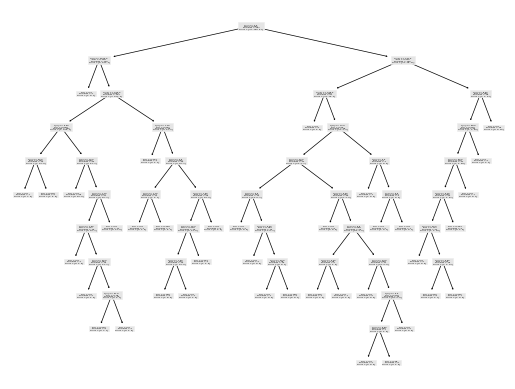

In [168]:
from sklearn import tree
tree.plot_tree(sleep_DT)

In [169]:
sleep_DT2 = DecisionTreeClassifier(max_depth = 3,random_state=0)
sleep_DT2 = sleep_DT2.fit(X_train, Y_train)
sleepDT_pred2 = sleep_DT2.predict(X_test)

[Text(0.4583333333333333, 0.875, 'X[7] <= 2.0\ngini = 0.552\nsamples = 251\nvalue = [47, 153, 51]'),
 Text(0.25, 0.625, 'X[8] <= 76.5\ngini = 0.118\nsamples = 146\nvalue = [5, 137, 4]'),
 Text(0.16666666666666666, 0.375, 'X[10] <= 129.0\ngini = 0.094\nsamples = 144\nvalue = [4, 137, 3]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.038\nsamples = 105\nvalue = [1, 103, 1]'),
 Text(0.25, 0.125, 'gini = 0.231\nsamples = 39\nvalue = [3, 34, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.6666666666666666, 0.625, 'X[11] <= 92.5\ngini = 0.616\nsamples = 105\nvalue = [42, 16, 47]'),
 Text(0.5, 0.375, 'X[10] <= 128.5\ngini = 0.428\nsamples = 57\nvalue = [41, 13, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.26\nsamples = 48\nvalue = [41, 4, 3]'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 8.05\ngini = 0.155\nsamples = 48\nvalue = [1, 3, 44]'),
 Text(0.75, 0.125, 'gini

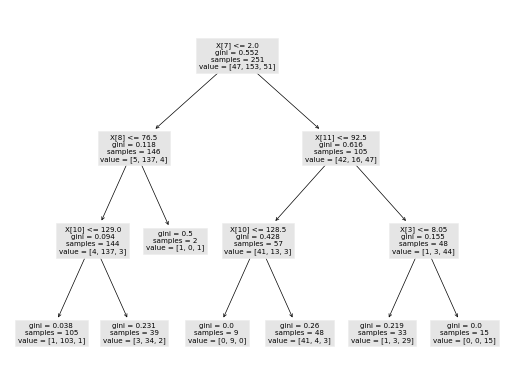

In [170]:
tree.plot_tree(sleep_DT2)

# Naive Bayes

In [172]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [173]:
sc=StandardScaler()

In [174]:
sleep_NB = GaussianNB()

In [175]:
sleep_NB.fit(X_train, Y_train)

GaussianNB()

In [177]:
sleepNB_pred = sleep_NB.predict(X_test)

In [178]:
sleep_NB.score(X_train, Y_train)

0.896414342629482

In [193]:
print("Accuracy:",metrics.accuracy_score(Y_test,sleepNB_pred))

Accuracy: 0.9166666666666666


# SVM

In [212]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [213]:
np.random.seed(1000)

In [214]:
svm = LinearSVC(random_state = 0)

In [215]:
svm.fit(X_train, Y_train)

C:\PRIYA\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [216]:
sleepsvm_pred = svm.predict(X_test)

In [217]:
svm.score(X_train, Y_train)

0.6095617529880478

In [218]:
print("Accuracy:",metrics.accuracy_score(Y_test,sleepsvm_pred))

Accuracy: 0.6111111111111112


# Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
LR = LogisticRegression()

In [221]:
LR_score = LR.fit(X_train, Y_train)

C:\PRIYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [222]:
from sklearn.neighbors import KNeighborsClassifier

In [223]:
sleep_knn = KNeighborsClassifier(n_neighbors=5)

In [224]:
sleep_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [225]:
sleepKnn_pred = sleep_knn.predict(X_test)

C:\PRIYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [226]:
sleep_knn.score(X_train, Y_train)

C:\PRIYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8924302788844621

In [227]:
print("Accuracy:",metrics.accuracy_score(Y_test,sleepKnn_pred))

Accuracy: 0.9074074074074074


# Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
sleep_RF = RandomForestClassifier(n_estimators=100)

In [230]:
sleep_RF.fit(X_train, Y_train)

RandomForestClassifier()

In [231]:
sleepRF_pred = sleep_RF.predict(X_test)

In [232]:
sleep_RF.score(X_train, Y_train)

0.9322709163346613

In [233]:
print("Accuracy:",metrics.accuracy_score(Y_test,sleepRF_pred))

Accuracy: 0.9351851851851852


# Lazy predict

In [263]:
!pip install pyforest

  Using cached pyforest-1.1.0.tar.gz (15 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=958e96244471dd992c133b22b0bece231952e5444cfa416df01d9f31a8652fff
  Stored in directory: c:\users\karte\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [264]:
import pyforest
import warnings

In [265]:
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 14.09it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.91,None,0.93,0.13
BaggingClassifier,0.94,0.91,None,0.93,0.04
XGBClassifier,0.94,0.91,None,0.93,0.81
SGDClassifier,0.94,0.91,None,0.93,0.02
RandomForestClassifier,0.94,0.91,None,0.93,0.17
LogisticRegression,0.94,0.91,None,0.93,0.05
LabelPropagation,0.93,0.91,None,0.93,0.02
LabelSpreading,0.93,0.91,None,0.93,0.02
BernoulliNB,0.93,0.89,None,0.93,0.02
